In [19]:
# import blind_test_data.csv and print the shape
import pandas as pd

test_data = pd.read_csv('test_data.csv')

print(test_data.shape)

(88283, 7)


In [20]:
from autogluon.tabular import TabularDataset, TabularPredictor

# load the training data
train_data = TabularDataset('test_data.csv')

train_data.head()

Loaded data from: test_data.csv | Columns = 7 / 7 | Rows = 88283 -> 88283


,SOC,V,I,P,V_avg_five,V_avg_one,I_avg
0,1.000000,4.159350,0.000000,0.000000,4.159350,4.159350,0.000000
1,0.999985,4.144870,-0.042657,-0.176808,4.152110,4.152110,-0.021328
2,0.999968,4.130847,-0.086232,-0.356210,4.145022,4.145022,-0.042963
3,0.999962,4.132999,-0.088823,-0.367105,4.142017,4.142017,-0.054428
4,0.999957,4.133799,-0.085364,-0.352877,4.140373,4.140373,-0.060615


In [31]:

# time limit for training is 10 mins, 1, 4, 12 hours
time_limit = [60*10, 60*60, 60*60*4, 60*60*12]

best_rmse = 100

for time in time_limit:

    # Load the training data
    train_data = TabularDataset('train_data.csv')   

    # Create a predictor
    predictor = TabularPredictor(label='SOC').fit(
        train_data, 
        time_limit=time, 
        presets=['best_quality']
    )

Loaded data from: train_data.csv | Columns = 7 / 7 | Rows = 5275740 -> 5275740
No path specified. Models will be saved in: "AutogluonModels/ag-20230611_190849/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230611_190849/"
AutoGluon Version:  0.7.0
Python Version:     3.10.8
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #148-Ubuntu SMP Mon Oct 17 16:02:06 UTC 2022
Train Data Rows:    5275740
Train Data Columns: 6
Label Column: SOC
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1.0323646335257406, -0.0014026891208436, 0.65955, 0.35458)
	If 'regression' is not the correct problem_type, please manually specify the problem_type par

KeyboardInterrupt: 

In [21]:
time_limit = 60

# train the model
predictor = TabularPredictor(label='SOC').fit(
    train_data, 
    time_limit=time_limit,
    presets='best_quality'
)


No path specified. Models will be saved in: "AutogluonModels/ag-20230611_185535/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20230611_185535/"
AutoGluon Version:  0.7.0
Python Version:     3.10.8
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #148-Ubuntu SMP Mon Oct 17 16:02:06 UTC 2022
Train Data Rows:    88283
Train Data Columns: 6
Label Column: SOC
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1.001855496372521, 0.1162339499769943, 0.54242, 0.32082)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'mu

In [22]:
# test the model
y_pred = predictor.predict(test_data)

# print the predictions leader board
print(predictor.leaderboard(test_data, silent=True))

                   model    score_test  score_val  pred_time_test  \
0  KNeighborsDist_BAG_L1 -1.250492e-08  -0.012498        0.328749   
1        LightGBM_BAG_L1 -8.465379e-04  -0.001379        2.384223   
2    WeightedEnsemble_L2 -8.536054e-04  -0.001378       12.696139   
3      LightGBMXT_BAG_L2 -1.286048e-03  -0.002198       20.495810   
4    WeightedEnsemble_L3 -1.286048e-03  -0.002198       20.497708   
5      LightGBMXT_BAG_L1 -2.050721e-03  -0.003002       10.306644   
6  KNeighborsUnif_BAG_L1 -1.098546e-02  -0.013975        0.315251   

   pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0       1.003719   0.180616                 0.328749                1.003719   
1       2.923631   5.907386                 2.384223                2.923631   
2      12.055525  33.621367                 0.005272                0.001009   
3      25.066411  48.804304                 7.160943               11.105421   
4      25.067405  48.806791                 0.0

In [23]:
predictor.evaluate(test_data, silent=True)

/home/witvoetk/anaconda3/envs/tf/lib/python3.10/site-packages/autogluon/tabular/predictor/predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(


{'root_mean_squared_error': -0.0008536053888903142,
 'mean_squared_error': -7.286421599425846e-07,
 'mean_absolute_error': -0.00048580923293873175,
 'r2': 0.9999929205578164,
 'pearsonr': 0.9999964602973269,
 'median_absolute_error': -0.0002489919351780223}

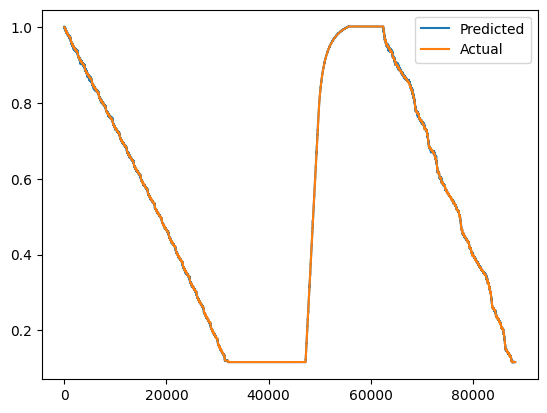

In [24]:
#plot the predictions vs the actual values in matplotlib
import matplotlib.pyplot as plt

plt.plot(y_pred, label='Predicted')
plt.plot(test_data['SOC'], label='Actual')
plt.legend()
plt.show()

In [28]:
#save the top performing model as a pickle file
import pickle

with open('test_model.pkl', 'wb') as f:
    pickle.dump(predictor, f)